Import Libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Countplot displaying count distribution for Legit and Fraud wine quality for diffrent types of wine

In [6]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [7]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

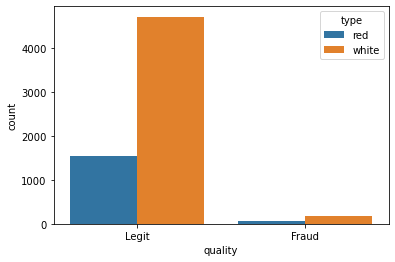

In [8]:
sns.countplot(data=df, x='quality', hue='type')

The percentage of red wines and the percentage of white wine which are fraud.

In [9]:
reds = df[df['type']=='red']
whites = df[df['type']=='white']

In [10]:
red_fraud_percent=100*len(reds[reds['quality']=='Fraud'])/len(reds)
red_fraud_percent

3.9399624765478425

In [11]:
whites_fraud_percent=100*len(whites[whites['quality']=='Fraud'])/len(whites)
whites_fraud_percent

3.736218864842793

There is not much difference in fraudulent percentages for both red and white wines.

Calculating correlation between features and quality column by mapping 0 and 1 to a string.

In [12]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Fraud'],
      dtype='object')

<Figure size 8800x6400 with 0 Axes>

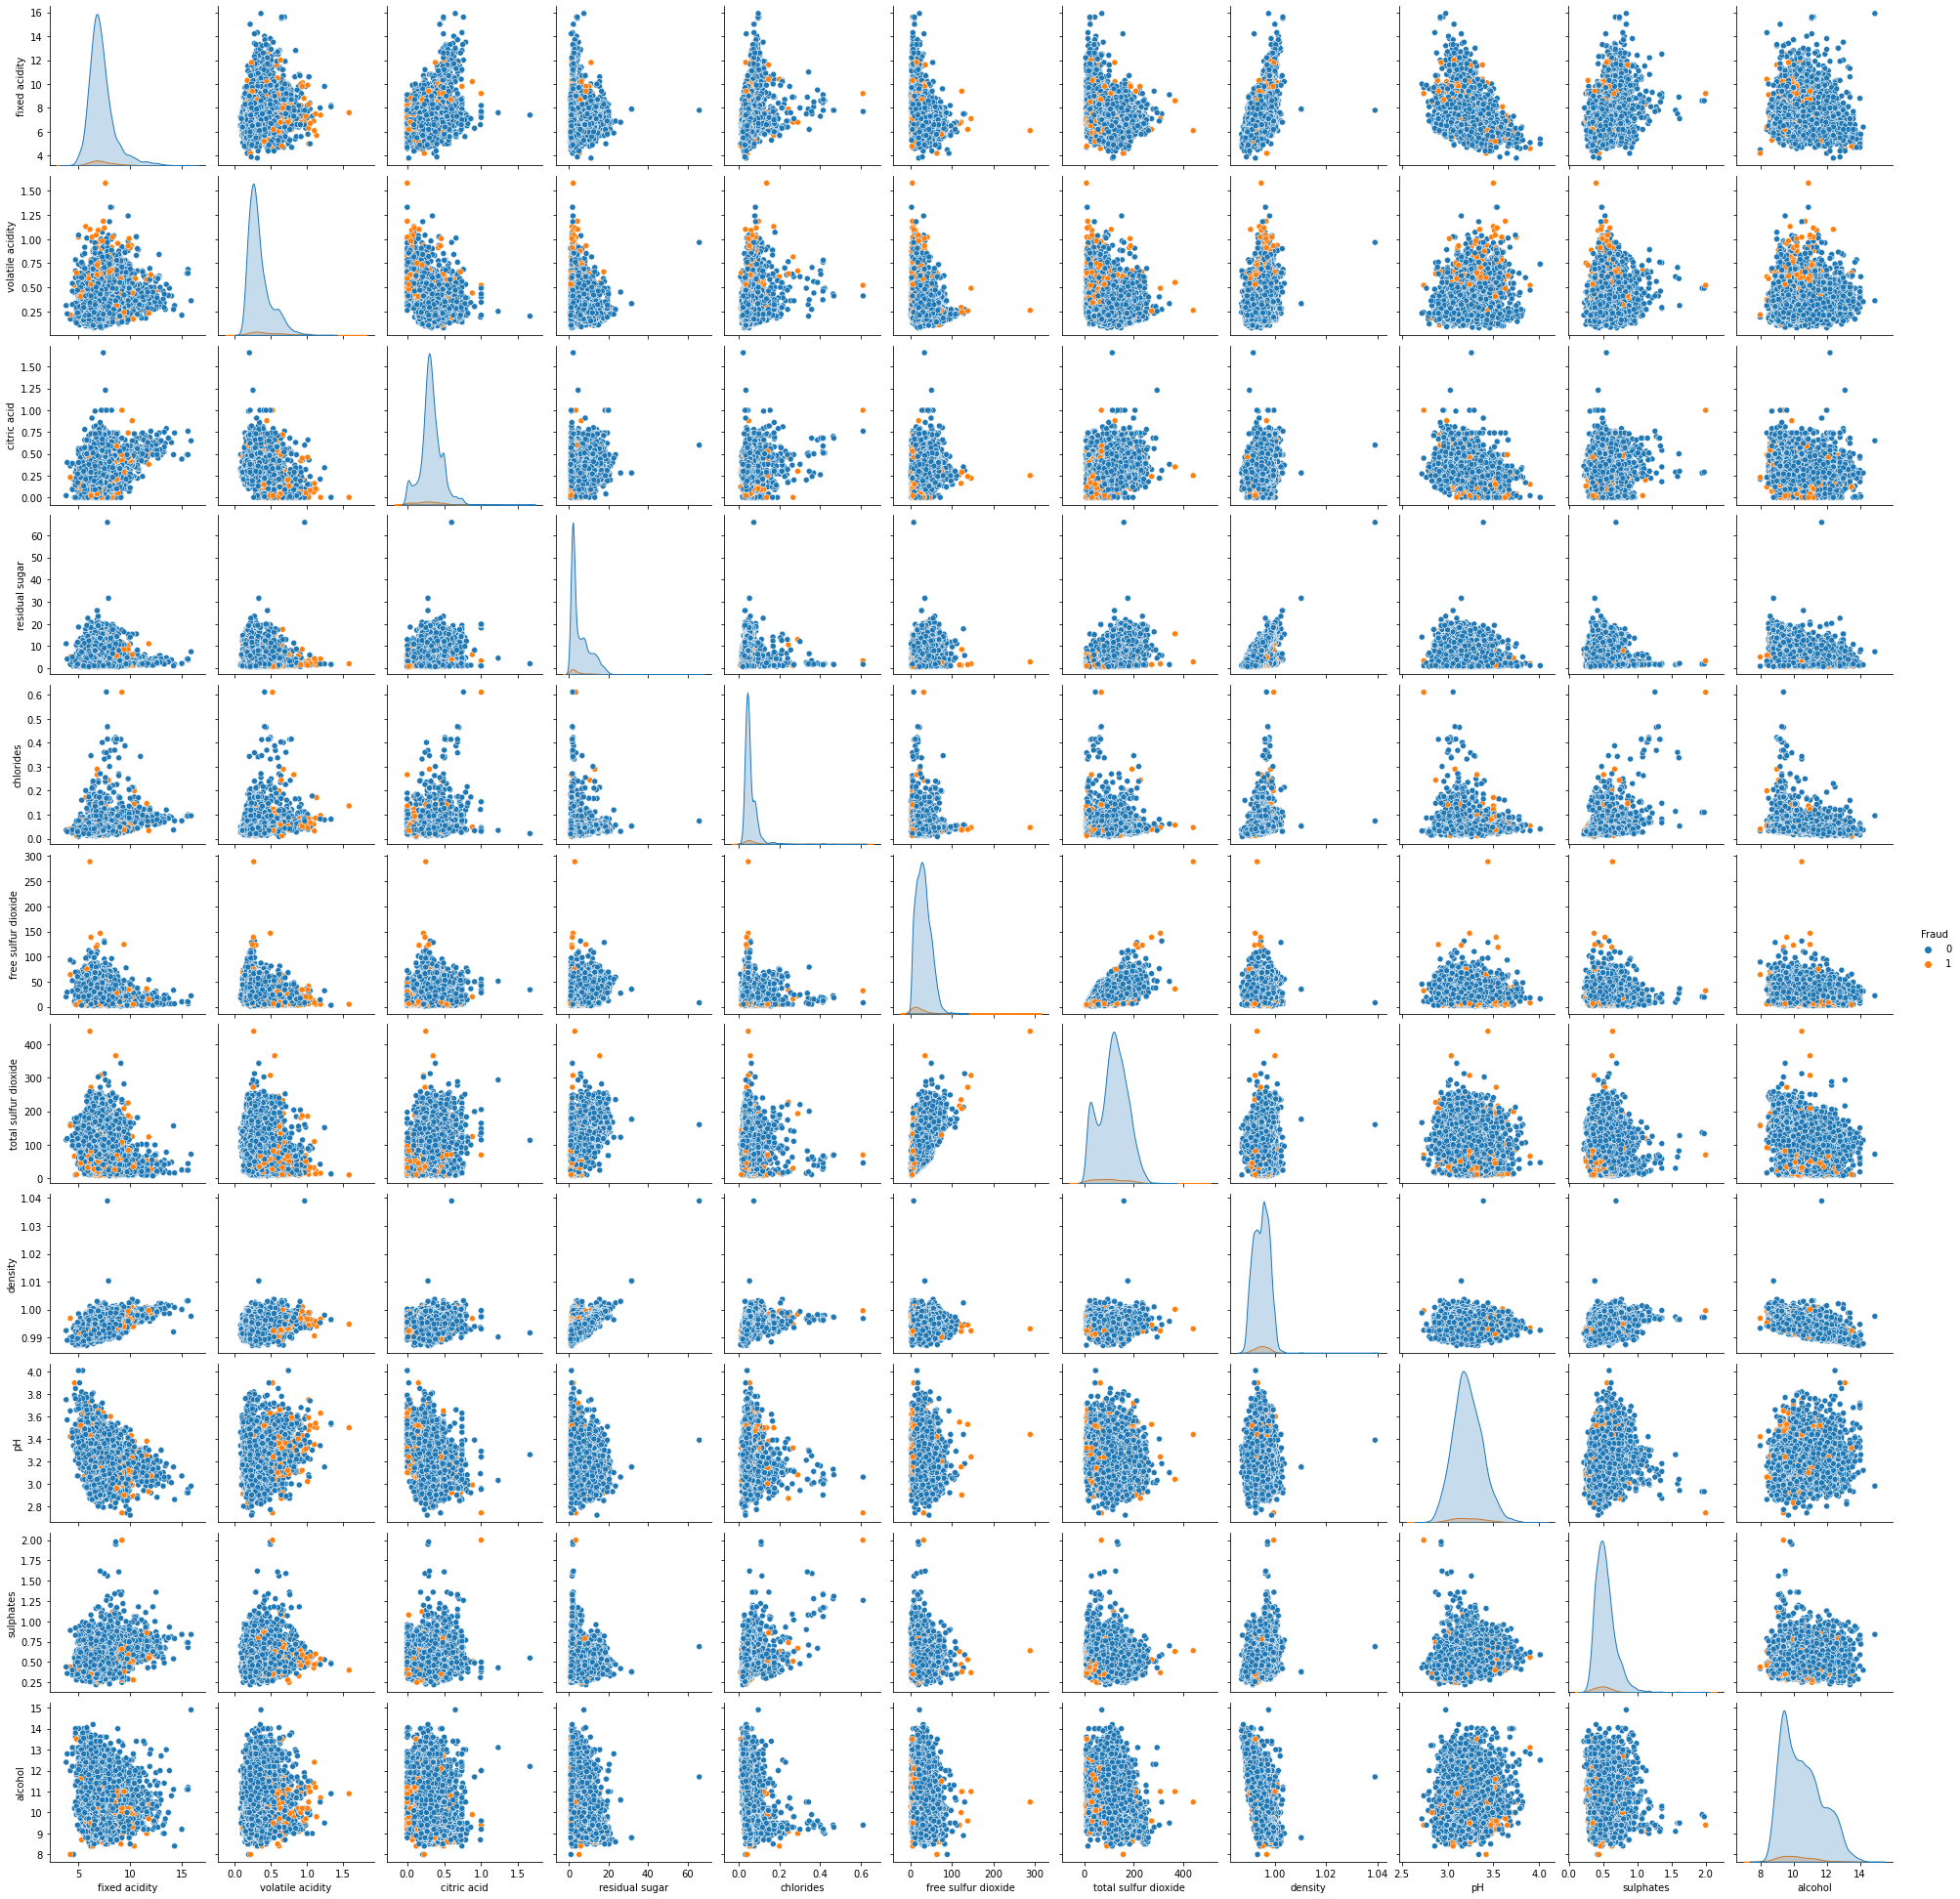

In [14]:
plt.figure(figsize= (22,16),dpi=400)
sns.pairplot(df,hue = 'Fraud')

In [15]:
df_corr=df.corr()['Fraud'][:-1].sort_values()
df_corr

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

<AxesSubplot:>

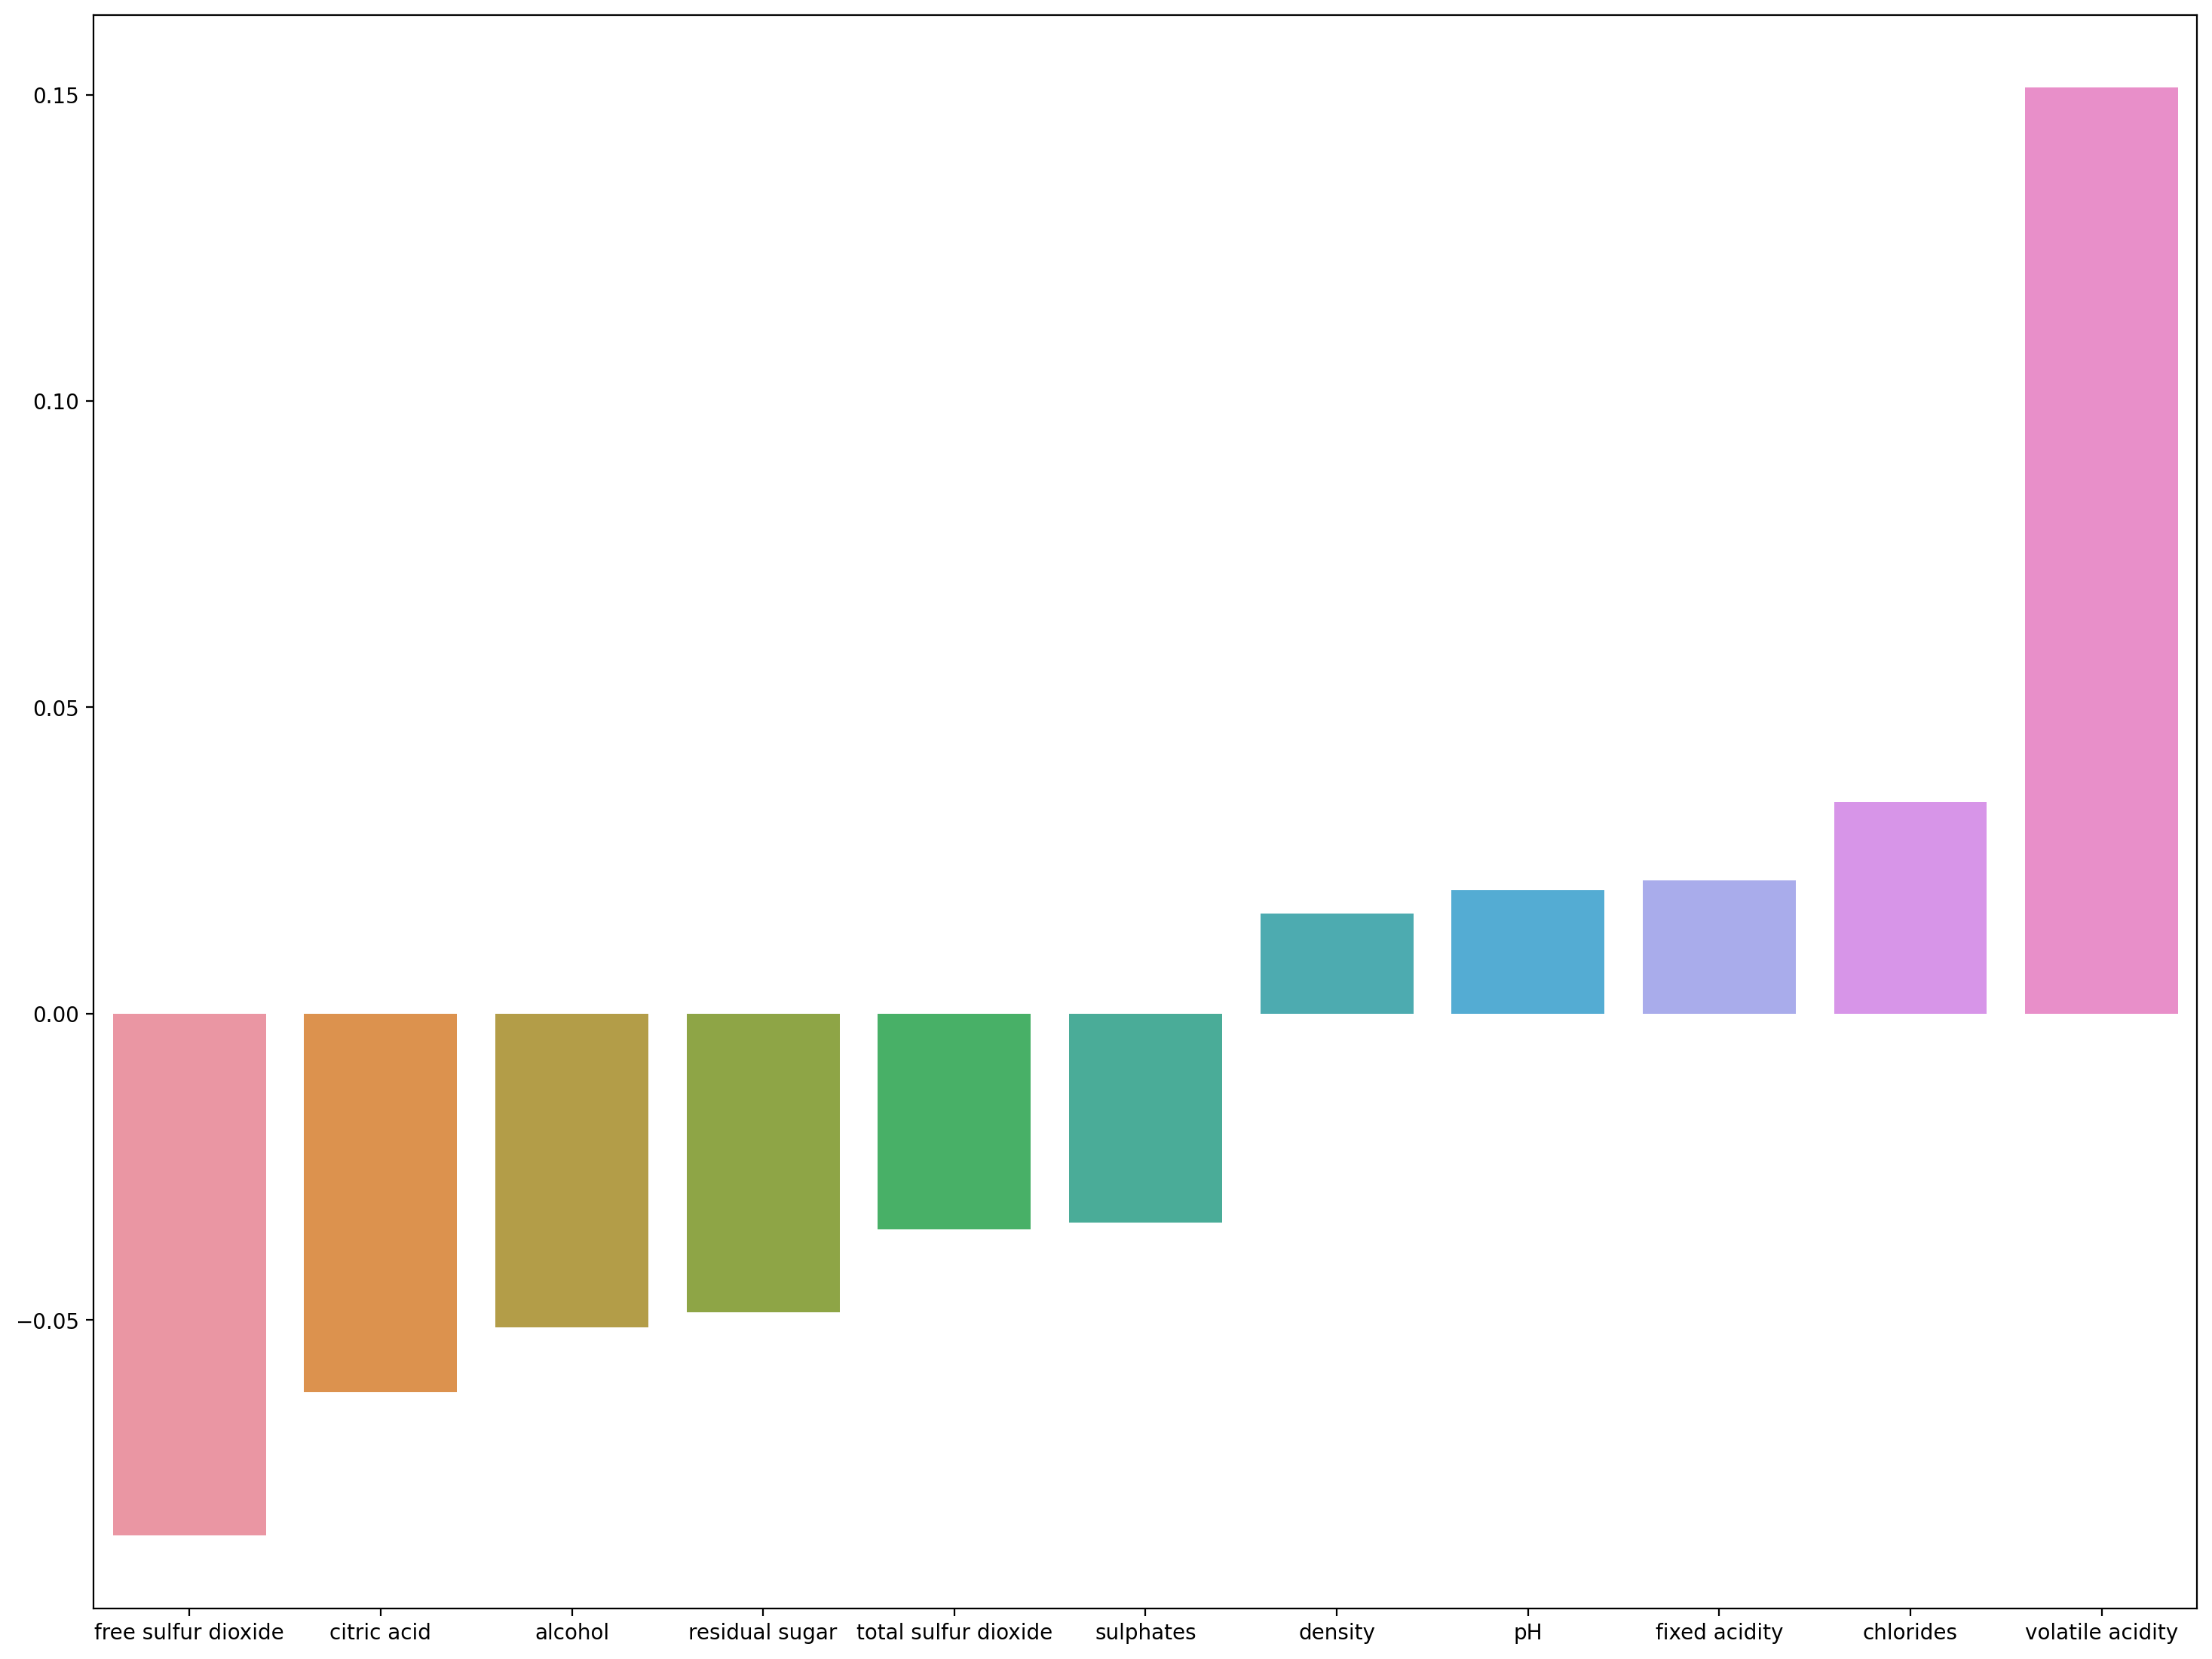

In [16]:
plt.figure(figsize= (18,14),dpi=200)
sns.barplot(x=df_corr.index, y= df_corr.values)

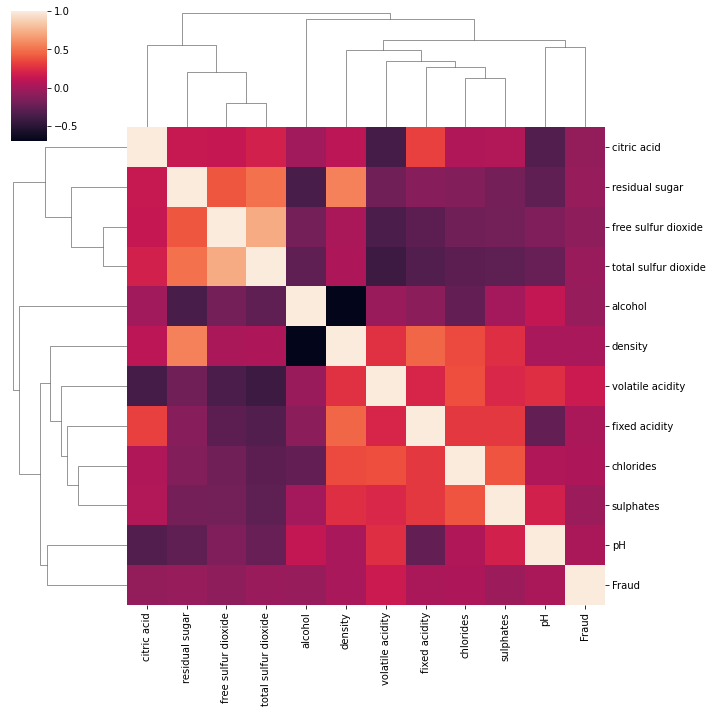

In [17]:
sns.clustermap(df.corr())

Building model

In [18]:
df= df.drop('Fraud', axis=1)

In [19]:
df['type']= pd.get_dummies(df['type'], drop_first=True)

Seperating data into X features and y target lebel and perform train|test split

In [20]:
X = df.drop('quality', axis=1)
y = df['quality']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Scaling X train and X test data

In [23]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Instance creation of Support Vector Machine classifier

In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC(class_weight='balanced')

Grid search to find best C and gamma parameters

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C':[0.001,0.005,0.01,0.05,0.1,0.3,0.5,0.8,1]}

In [28]:
grid = GridSearchCV(svc,param_grid)

In [29]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8,
                               1]})

In [30]:
grid.best_params_

{'C': 1}

Confusion matrix and classification report

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
grid_preds = grid.predict(scaled_X_test)

In [33]:
confusion_matrix(y_test,grid_preds)

array([[ 17,  10],
       [ 92, 531]])

Comparing true label vs predicted label

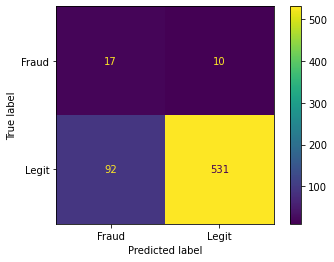

In [34]:
plot_confusion_matrix(grid, scaled_X_test,y_test)

Here, our model predicted 92 legit wine as fraudulent and 10 fraudulent wine were predicted as legit. We were able to correctly label 17 fraudulent wine.
To find out whether our model is good lets do full classification report.

In [35]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



In [36]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

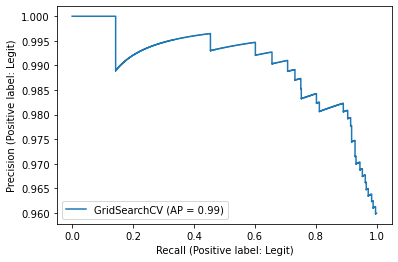

In [37]:
plot_precision_recall_curve(grid, scaled_X_test, y_test)

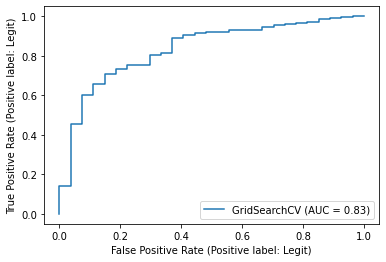

In [38]:
plot_roc_curve(grid, scaled_X_test, y_test)

From classification_report,precision_recall_curve and roc_curve we can clearly see that our model has poor precision and recall, however, F1-score of legitimate white wine is pretty good.
It seems that chemical properties alone are not good differentiator between fraudulent and legitimate wines.So, I would recommend to include non chemical features such as label details, packaging features, purchase history and so on.
From this machine learning model, it can be concluded that eventhough this chemical analysis and model is good first step to take. However, we need to explore and include non chemical features as well as precision and recall values of our model is quite poor when finding fraudulent wines.